In [53]:
from molecule import Molecule
from molpro import Molpro
from pes import PES
from avg_pes import Avg_PES
import numpy as np
from nifty import pvec1d,pmat2d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
#filepath='examples/tests/fluoroethene.xyz'
filepath='examples/tests/butadiene_ethene.xyz'
nocc=11
nactive=2
lot=Molpro.from_options(states=[(1,0),(1,1)],charge=0,nocc=nocc,nactive=nactive,basis='6-31G',do_coupling=False,nproc=4,fnm=filepath)
pes1 = PES.from_options(lot=lot,ad_idx=0,multiplicity=1)
pes2 = PES.from_options(lot=lot,ad_idx=1,multiplicity=1)
pes = Avg_PES(pes1,pes2,lot=lot)
M = Molecule.from_options(fnm=filepath,PES=pes,coordinate_type="HDLC")


 initializing LOT from file
 reading cartesian coordinates from file
 making primitives from options!
 making primitive Hessian
printing diagonals
 0.35  0.35  0.35  0.35  0.35  0.35  0.35  0.35  0.35  0.35  0.35  0.35  0.35  0.35  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.04  0.04  0.04  0.04  0.04  0.04  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05 
forming Hessian in basis


In [5]:
print(M)

 molecule object
Option:
  Key: fnm
  Value: examples/tests/fluoroethene.xyz
  Required: False
  Allowed Types: [<type 'str'>]
  Allowed Values: None
  Doc: File name to create the Molecule object from. Only used if geom is none.

Option:
  Key: ftype
  Value: xyz
  Required: False
  Allowed Types: [<type 'str'>]
  Allowed Values: None
  Doc: filetype (optional) will attempt to read filetype if not given

Option:
  Key: coordinate_type
  Value: TRIC
  Required: False
  Allowed Types: None
  Allowed Values: ['Cartesian', 'DLC', 'HDLC', 'TRIC']
  Doc: The type of coordinate system to build

Option:
  Key: coord_obj
  Value: Internal coordinate system (atoms numbered from 1):
Distance 1-2
Distance 1-3
Distance 1-4
Distance 2-5
Distance 2-6
Angle 2-1-4
Angle 3-1-4
Angle 1-2-6
Angle 5-2-6
Out-of-Plane 1-2-3-4
Out-of-Plane 2-1-5-6
Dihedral 3-1-2-5
Dihedral 3-1-2-6
Dihedral 4-1-2-5
Dihedral 4-1-2-6
Translation-X 1-6
Translation-Y 1-6
Translation-Z 1-6
Rotation-A 1-6
Rotation-B 1-6
Rotation-C 

In [10]:
print("printing gradient")
pvec1d(M.gradient,5,'f')

printing gradient
 0.00000 -0.00000  0.00000 -0.00000 -0.00000 -0.03900  0.00000  0.11042 -0.00865 -0.00021 -0.08551  0.03612 -0.01385  0.00000 -0.06188  0.03393  0.00000  0.00000 


In [8]:
M.energy

-110849.50076732112

In [58]:
print("primitive internal coordinates")
from nifty import commadash
print(M.primitive_internal_coordinates)

primitive internal coordinates
[Distance 1-9, Distance 1-2, Distance 1-8, Distance 2-3, Distance 2-7, Distance 3-4, Distance 3-16, Distance 4-14, Distance 4-15, Distance 5-10, Distance 5-11, Distance 5-6, Distance 6-13, Distance 6-12, Angle 2-1-9, Angle 8-1-9, Angle 1-2-7, Angle 3-2-7, Angle 2-3-16, Angle 4-3-16, Angle 3-4-15, Angle 14-4-15, Angle 10-5-11, Angle 6-5-11, Angle 12-6-13, Angle 5-6-13, Out-of-Plane 1-2-8-9, Out-of-Plane 2-1-3-7, Out-of-Plane 3-2-4-16, Out-of-Plane 4-3-14-15, Out-of-Plane 5-6-10-11, Out-of-Plane 6-5-12-13, Dihedral 9-1-2-3, Dihedral 9-1-2-7, Dihedral 8-1-2-3, Dihedral 8-1-2-7, Dihedral 1-2-3-4, Dihedral 1-2-3-16, Dihedral 7-2-3-4, Dihedral 7-2-3-16, Dihedral 2-3-4-14, Dihedral 2-3-4-15, Dihedral 16-3-4-14, Dihedral 16-3-4-15, Dihedral 10-5-6-13, Dihedral 10-5-6-12, Dihedral 11-5-6-13, Dihedral 11-5-6-12, Cartesian-X 1, Cartesian-X 2, Cartesian-X 3, Cartesian-X 4, Cartesian-X 5, Cartesian-X 6, Cartesian-X 7, Cartesian-X 8, Cartesian-X 9, Cartesian-X 10, Cart

In [10]:
print("primitive number of internal coordinates")
print(M.num_primitives)

primitive number of internal coordinates
15


In [13]:
print("getting the value of a primitive 0")
print(M.primitive_internal_coordinates[0].value(M.xyz))

getting the value of a primitive 0
1.3308189789788099


In [15]:
print("printing delocalized coordinates basis")
pmat2d(M.coord_basis,format='f')

printing delocalized coordinates basis
 0.0 -0.0 -0.0  0.0  0.0  0.3  0.0 -0.8  0.0 -0.0  0.3 -0.1  0.1 -0.0  0.5 -0.1 -0.0 -0.0 
 0.0 -0.0  0.0 -0.0  0.0  0.1  0.0 -0.2 -0.2  0.6 -0.5 -0.4  0.0 -0.0 -0.2 -0.2  0.0  0.0 
-0.0  0.0 -0.0  0.0 -0.0 -0.1 -0.0 -0.3  0.4  0.3 -0.3  0.6 -0.4  0.0 -0.1  0.1  0.0  0.0 
-0.0 -0.0  0.0  0.0  0.0  0.1 -0.0 -0.2  0.3 -0.6 -0.5 -0.4 -0.2 -0.0 -0.1  0.3  0.0  0.0 
 0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0 -0.3 -0.5 -0.3 -0.4  0.5  0.5 -0.0 -0.1 -0.1 -0.0  0.0 
-0.0  0.0 -0.0 -0.0 -0.0 -0.6 -0.0 -0.3  0.3 -0.1  0.2 -0.1  0.1 -0.0 -0.4 -0.5 -0.0 -0.0 
-0.0  0.0 -0.0  0.0 -0.0 -0.5 -0.0  0.1  0.3  0.2 -0.2 -0.1  0.5 -0.0  0.5  0.3 -0.0 -0.0 
 0.0  0.0 -0.0 -0.0 -0.0 -0.5  0.0 -0.3 -0.5  0.1  0.2 -0.1 -0.2  0.0 -0.2  0.6  0.0 -0.0 
 0.0  0.0 -0.0 -0.0 -0.0 -0.3  0.0  0.1 -0.3 -0.2 -0.3 -0.0 -0.5  0.0  0.5 -0.4 -0.0 -0.0 
-0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0  0.0  0.0 -0.0  0.0  0.0  0.1  0.0  0.0  0.4  0.3 
 0.0 -0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.0 -0.0 -

In [18]:
print("printing coordinates in basis")
pmat2d(M.coordinates.T,format='f')

printing coordinates in basis
-3.2 -2.5 -1.3 -1.3 -0.0 -3.4 -0.0 -2.9 -0.4  0.2 -1.8 -0.9 -0.2 -0.7  0.8 -0.2 -3.8  0.3 


In [32]:
dq = np.zeros((M.num_coordinates,1))
dq[0]=0.1
print("taking step and printing new xyz,geom and coordinates")
M.update_xyz(dq)
print
print("new coordinates (in basis)")
pmat2d(M.coordinates.T,format='f')
print
print("new xyz")
pmat2d(M.xyz,4,format='f')
print
print("new geometry")
for atom in M.geometry:
    print("%-2s %5.4f %5.4f %5.4f") % (atom[0],atom[1],atom[2],atom[3])

taking step and printing new xyz,geom and coordinates
Iter: 1 Err-dQ = 2.77242e-03 RMSD: 5.77350e-02 Damp: 1.00000e+00
Iter: 2 Err-dQ (Best) = 4.44068e-08 (2.77242e-03) RMSD: 8.15263e-04 Damp: 1.00000e+00 (Good)
Cartesian coordinates obtained after 2 microiterations (rmsd = 8.153e-04 |dQ| = 4.441e-08)

new coordinates (in basis)
-1.9 -2.5 -1.3 -1.3 -0.0 -3.4 -0.0 -2.9 -0.4  0.2 -1.8 -0.9 -0.2 -0.7  0.8 -0.2 -3.8  0.3 

new xyz
-3.5137  1.5489  0.0892 
-2.4157  2.0435  0.6558 
-4.7408  1.9416  0.5206 
-3.4370  0.8296 -0.7202 
-2.4933  2.7626  1.4649 
-1.4331  1.7327  0.3145 

new geometry
C  -3.5137 1.5489 0.0892
C  -2.4157 2.0435 0.6558
F  -4.7408 1.9416 0.5206
H  -3.4370 0.8296 -0.7202
H  -2.4933 2.7626 1.4649
H  -1.4331 1.7327 0.3145


In [19]:
# update coordinate basis
print("update coordinate basis")
pmat2d(M.update_coordinate_basis(),format='f')  #also used with constraints


update coordinate basis
 0.0 -0.0 -0.0  0.0  0.0  0.3  0.0 -0.8  0.0 -0.0  0.3 -0.1  0.1 -0.0  0.5 -0.1 -0.0 -0.0 
 0.0 -0.0  0.0 -0.0  0.0  0.1  0.0 -0.2 -0.2  0.6 -0.5 -0.4  0.0 -0.0 -0.2 -0.2  0.0  0.0 
-0.0  0.0 -0.0  0.0 -0.0 -0.1 -0.0 -0.3  0.4  0.3 -0.3  0.6 -0.4  0.0 -0.1  0.1  0.0  0.0 
-0.0 -0.0  0.0  0.0  0.0  0.1 -0.0 -0.2  0.3 -0.6 -0.5 -0.4 -0.2 -0.0 -0.1  0.3  0.0  0.0 
 0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0 -0.3 -0.5 -0.3 -0.4  0.5  0.5 -0.0 -0.1 -0.1 -0.0  0.0 
-0.0  0.0 -0.0 -0.0 -0.0 -0.6 -0.0 -0.3  0.3 -0.1  0.2 -0.1  0.1 -0.0 -0.4 -0.5 -0.0 -0.0 
-0.0  0.0 -0.0  0.0 -0.0 -0.5 -0.0  0.1  0.3  0.2 -0.2 -0.1  0.5 -0.0  0.5  0.3 -0.0 -0.0 
 0.0  0.0 -0.0 -0.0 -0.0 -0.5  0.0 -0.3 -0.5  0.1  0.2 -0.1 -0.2  0.0 -0.2  0.6  0.0 -0.0 
 0.0  0.0 -0.0 -0.0 -0.0 -0.3  0.0  0.1 -0.3 -0.2 -0.3 -0.0 -0.5  0.0  0.5 -0.4 -0.0 -0.0 
-0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0  0.0  0.0 -0.0  0.0  0.0  0.1  0.0  0.0  0.4  0.3 
 0.0 -0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0 -0.0 -

In [35]:
print("coords in new basis")
pmat2d(M.coordinates.T,format='f')


coords in new basis
-1.9 -2.5 -1.3 -1.3 -0.0 -3.4 -0.0 -2.9 -0.4  0.2 -1.8 -0.9 -0.2 -0.7  0.8 -0.2 -3.8  0.3 


In [37]:
print("update Hessian in  basis")
pmat2d(M.form_Hessian_in_basis(),format='f')


update Hessian in  basis
 0.0  0.0 -0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0 
-0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0 
-0.0  0.0  0.1  0.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0 
-0.0 -0.0  0.0  0.1 -0.0  0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0 
 0.0 -0.0 -0.0 -0.0  0.1  0.0  0.0 -0.0 -0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0 
 0.0 -0.0  0.0  0.0  0.0  0.2  0.0 -0.0 -0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0  0.0 
 0.0  0.0 -0.0 -0.0  0.0  0.0  0.1 -0.0 -0.0  0.0 -0.0  0.0  0.0  0.0  0.0 -0.0 -0.0  0.0 
-0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0  0.3 -0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0 
-0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.3 -0.0  0.0  0.0 -0.1  0.0  0.0  0.0  0.0 -0.0 
 0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.3  0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0 
-0.0 -0.0 -0.0  0.0  0.0  0.0 -0.0  0.0  0.0  0.0  0.3  0.0  0.0 

96


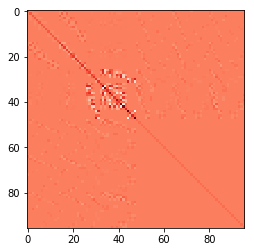

In [73]:
print(M.num_primitives)
B = M.coord_obj.Prims.wilsonB(M.xyz)
BBT = np.dot(B,B.T)
#plt.imshow(M.coord_obj.Prims.wilsonB(M.xyz), cmap=plt.cm.get_cmap('RdBu'))
plt.imshow(BBT, cmap=plt.cm.get_cmap('Reds'))
plt.show()

In [62]:
pmat2d(M.coord_obj.Prims.wilsonB(M.xyz),format='f')

-0.1  0.9  0.4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1 -0.9 -0.4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 0.6 -0.7  0.4 -0.6  0.7 -0.4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
-0.5 -0.2 -0.8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.2  0.8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 0.0  0.0  0.0  0.1 -0.9 -0.3 -0.1  0.9  0.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 0.0  0.0  0.0  0.5  0.3  0.8  0.0  

-1.5 -0.6  1.1  1.5  0.5 -1.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.8 -0.3  0.6  0.0  0.0  0.0  0.8  0.3 -0.6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 1.6  0.6 -1.1 -1.4 -0.5  1.0  0.7  0.2 -0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.8 -0.3  0.6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 0.9  0.4 -0.6  0.7  0.2 -0.6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.8 -0.3  0.6 -0.8 -0.3  0.6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
-0.7 -0.3  0.5  1.3  0.6 -1.2 -0.9 -0.6  1.5  0.3  0.3 -0.8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
-0.7 -0.3  0.5  1.0  0.3 -0.5  0.1  

 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [9]:

# copying molecule automatically copies all Data
print("copy molecule")
newMolecule = Molecule.copy_from_options(M)
print("\n")
print("###############################")
print("Note that the copy from options is recommended since it properly creates new coord_obj and PES object")

copy molecule
 creating copy, new node id = 1
 old node id =  0
  cp scratch/mp_0000_000 scratch/mp_0000_001
 initializing LOT from file
 making primitives from options!
 getting cartesian coordinates from geom
 getting coord_object from options


###############################
Note that the copy from options is recommended since it properly creates new coord_obj and PES object


In [10]:
print(newMolecule)

 molecule object
Option:
  Key: fnm
  Value: examples/tests/fluoroethene.xyz
  Required: False
  Allowed Types: [<class 'str'>]
  Allowed Values: None
  Doc: File name to create the Molecule object from. Only used if geom is none.

Option:
  Key: ftype
  Value: xyz
  Required: False
  Allowed Types: [<class 'str'>]
  Allowed Values: None
  Doc: filetype (optional) will attempt to read filetype if not given

Option:
  Key: coordinate_type
  Value: DLC
  Required: False
  Allowed Types: None
  Allowed Values: ['Cartesian', 'DLC', 'HDLC', 'TRIC']
  Doc: The type of coordinate system to build

Option:
  Key: coord_obj
  Value: Internal coordinate system (atoms numbered from 1):
Distance 1-2
Distance 1-3
Distance 1-4
Distance 2-5
Distance 2-6
Angle 2-1-4
Angle 3-1-4
Angle 1-2-6
Angle 5-2-6
Out-of-Plane 1-2-3-4
Out-of-Plane 2-1-5-6
Dihedral 3-1-2-5
Dihedral 3-1-2-6
Dihedral 4-1-2-5
Dihedral 4-1-2-6
<class 'slots.Distance'> : 5
<class 'slots.Angle'> : 4
<class 'slots.OutOfPlane'> : 2
<class '

In [28]:
print("copy molecule with new geom")
newxyz2 = np.ones(M.xyz.shape)
newxyz2 += M.xyz
newMolecule2 = Molecule.copy_from_options(M,xyz=newxyz2)
print(newMolecule2.xyz)


copy molecule with new geom
 creating copy, new node id = 1
 old node id =  0
  cp scratch/mp_0000_000 scratch/mp_0000_001
 initializing LOT from file
 making primitives from options!
 getting cartesian coordinates from geom
 getting coord_object from options
[[-3.5196  3.1864  0.9875]
 [-2.1607  3.1785  0.9906]
 [-4.3255  3.927   1.8144]
 [-4.0128  2.5534  0.2703]
 [-1.5303  3.7705  1.6628]
 [-1.6585  2.5386  0.2744]]


In [36]:
from eigenvector_follow import eigenvector_follow
ef = eigenvector_follow.from_options() #Linesearch=NoLineSearch)

In [39]:
ef.optimize(
    molecule=M,
    refE=M.energy,
    opt_steps=5
)

turning energy off for demonstration purpose
self.PES.get_energy(self.xyz)
turning energy off for demonstration purpose
self.PES.get_energy(self.xyz)
initial E 0.0000
turning energy off for demonstration purpose
self.PES.get_energy(self.xyz)
turning energy off for demonstration purpose
self.PES.get_energy(self.xyz)
turning gradient off for demonstration purpose
#gradx = self.PES.get_gradient(self.xyz) 
#return self.coord_obj.calcGrad(self.xyz,gradx)  #CartesianCoordinate just returns gradx


AttributeError: 'float' object has no attribute 'copy'